### This coded file is also availbale at **[github.com/KOMPALALOKESH/assignment/](https://github.com/KOMPALALOKESH/assignment/blob/main/assignment.ipynb)**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!git clone 'https://github.com/KOMPALALOKESH/assignment'

Cloning into 'assignment'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 26 (delta 8), reused 3 (delta 0), pack-reused 5
Unpacking objects: 100% (26/26), 42.61 MiB | 14.38 MiB/s, done.


In [ ]:
%cd '/kaggle/working/assignment'

/kaggle/working/assignment


In [ ]:
# import pandas lib as pd
import pandas as pd

# read by default 1st sheet of an excel file
df = pd.read_excel('/kaggle/working/assignment/data.xlsx')

## 1.Feature Engineering



1. **amenities**: It's in a JSON-like format where each amenity is enclosed in double quotes.
2. **host_since**: Date when the host started operating, formatted as MM/DD/YYYY.
3. **last_review**: Presumably, this is the date of the last review for the property, also formatted as MM/DD/YYYY.

In [ ]:
import ast
from datetime import datetime

feature_engineering_df = df[['amenities', 'host_since', 'last_review']]

### `Aminities_Count`

By removing unnecessary characters and splitting the string, the code transforms the amenities data into a format that's easier to work with for further analysis. The 'amenities_count' column provides a quantitative measure of the number of amenities offered by each property.

In [ ]:
feature_engineering_df['amenities'] = feature_engineering_df['amenities'].str.replace('"','').str.split("{").str[1].str.rstrip('}').str.split(",")
feature_engineering_df['amenities_count'] = feature_engineering_df['amenities'].apply(len)

/tmp/ipykernel_18/3329495841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_engineering_df['amenities'] = feature_engineering_df['amenities'].str.replace('"','').str.split("{").str[1].str.rstrip('}').str.split(",")
/tmp/ipykernel_18/3329495841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_engineering_df['amenities_count'] = feature_engineering_df['amenities'].apply(len)


### `Host_Tenure`

In [ ]:
# Step 1: Convert 'host_since' column to datetime
feature_engineering_df['host_since'] = pd.to_datetime(feature_engineering_df['host_since'])

# Step 2: Replace NA values in 'host_since' with the earliest date available
earliest_date = feature_engineering_df['host_since'].min()
feature_engineering_df['host_since'].fillna(earliest_date, inplace=True)

# Step 3: Calculate the tenure in days
current_date = datetime.now()
feature_engineering_df['Host_Tenure'] = (current_date - feature_engineering_df['host_since']).dt.days

# Step 4: Convert tenure from days to years
feature_engineering_df['Host_Tenure'] = (feature_engineering_df['Host_Tenure'] / 365).astype(int)

/tmp/ipykernel_18/3372188637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_engineering_df['host_since'] = pd.to_datetime(feature_engineering_df['host_since'])
/tmp/ipykernel_18/3372188637.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feature_engineering_df['host_since

### `Days_Since_Last_Review`

In [ ]:
# Convert 'last_review' to datetime
feature_engineering_df['last_review'] = pd.to_datetime(feature_engineering_df['last_review'])

# Calculate today's date
today = datetime.today()

# Calculate Days_Since_Last_Review
feature_engineering_df['Days_Since_Last_Review'] = (today - feature_engineering_df['last_review']).dt.days

/tmp/ipykernel_18/1425350062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_engineering_df['last_review'] = pd.to_datetime(feature_engineering_df['last_review'])
/tmp/ipykernel_18/1425350062.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_engineering_df['Days_Since_Last_Review'] = (today - feature_engineering_df['last_review']).dt.days


In [ ]:
# Handling NaN values in 'Days_Since_Last_Review'
feature_engineering_df['Days_Since_Last_Review'].fillna(-1, inplace=True)

/tmp/ipykernel_18/1431839847.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feature_engineering_df['Days_Since_Last_Review'].fillna(-1, inplace=True)
/tmp/ipykernel_18/1431839847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_engineering_df['Days_Since_Last_Review'].fillna(-1, inplace=True)


## 2.Exploratory Data Analysis (EDA)

* The **log_price** serves as the target variable, indicating the logarithm of the house price.
* **property_type** and **room_type** offer categorical insights into the type of property and its usage, respectively.
* **Accommodates** quantifies the property's capacity, potentially influencing pricing.
* **number_of_reviews** reflects customer engagement and satisfaction, influencing buyer perceptions and, consequently, prices.

In [ ]:
EDA_df = df[['log_price', 'property_type', 'room_type', 'accommodates', 'number_of_reviews']]

### Categorical and Numerical Correlation

In [ ]:
import pandas as pd

# Perform one-hot encoding for categorical variables
EDA_df_encoded = pd.get_dummies(EDA_df, columns=['property_type', 'room_type'])

# Correlation analysis
corr_matrix = EDA_df_encoded.corr()

### Statistical Plots

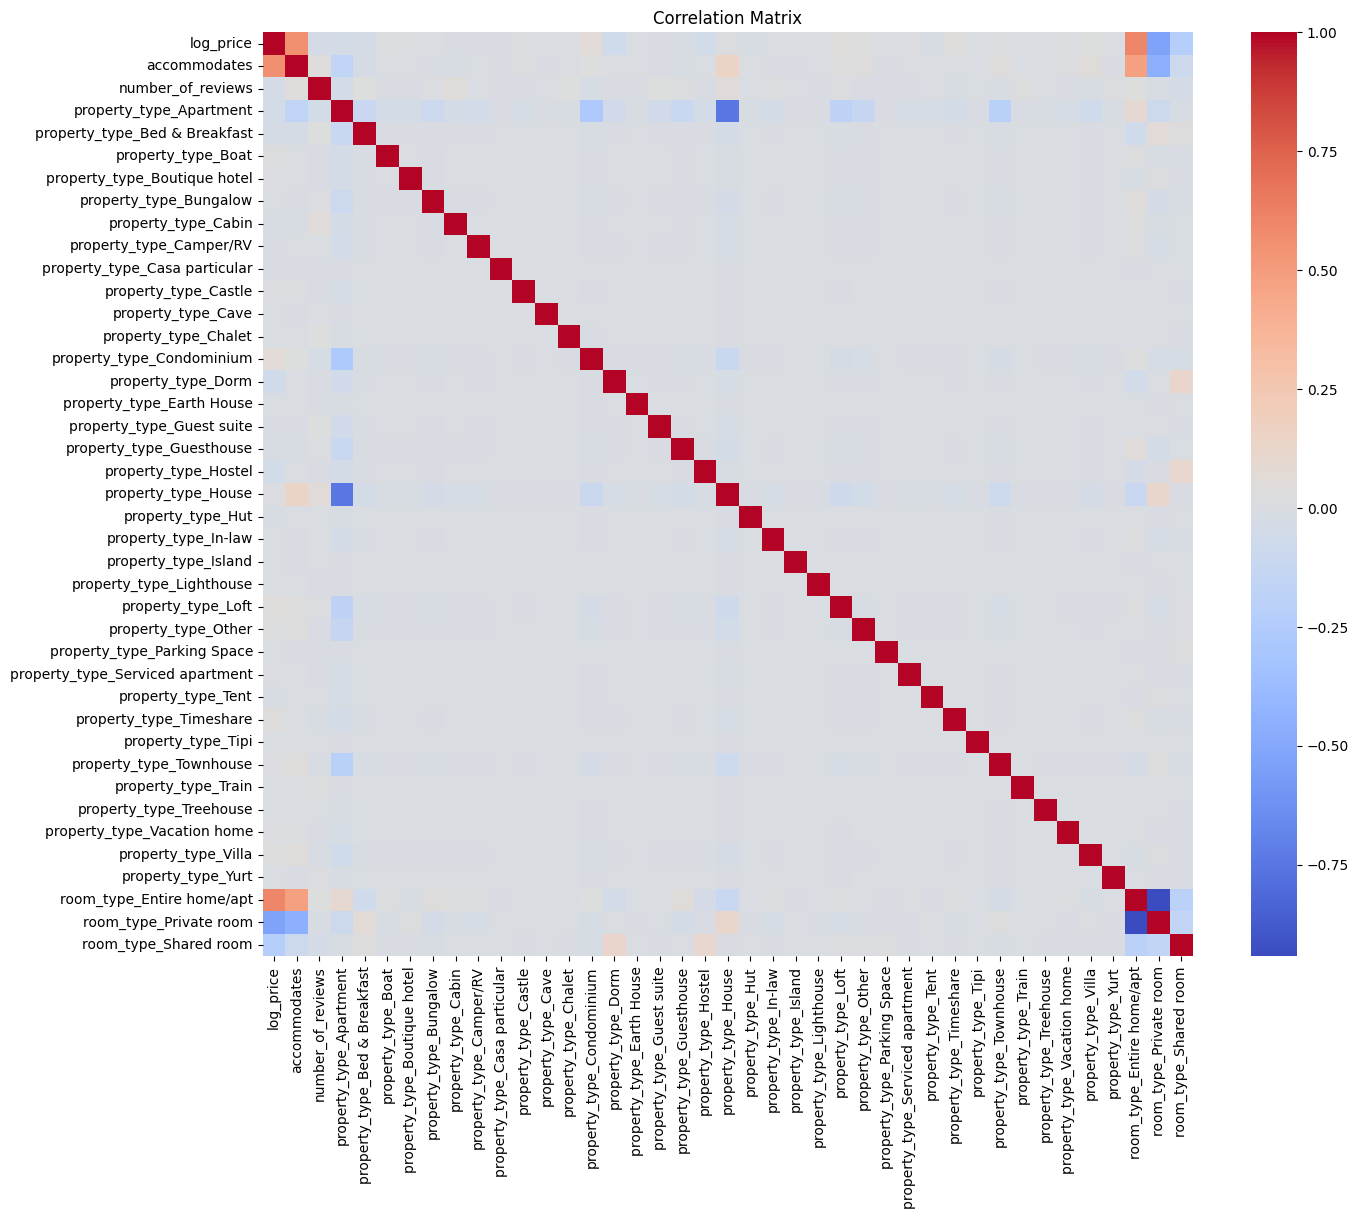

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))

# Correlation Matrix
sns.heatmap(corr_matrix, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()

Distribution of log_price appears to be **right skewed**, meaning there are more data points with lower values of log_price than higher values, it appears the most frequent value falls around **10,000** on the x-axis.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


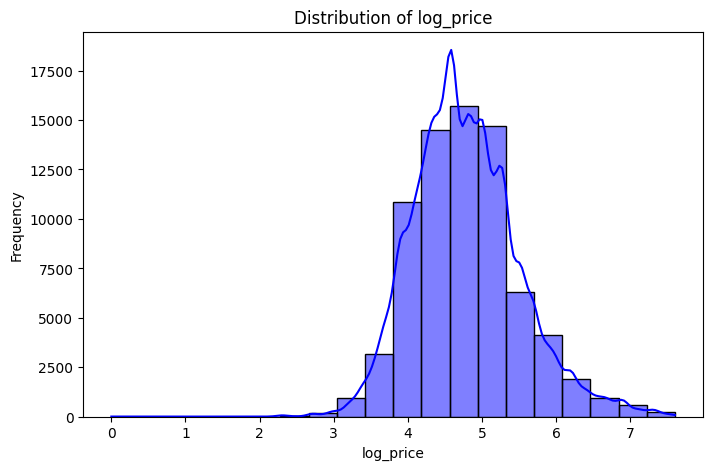

In [ ]:
# Histogram for log_price
plt.figure(figsize=(8, 5))
sns.histplot(df['log_price'], bins=20, kde=True, color='blue')
plt.title('Distribution of log_price')
plt.xlabel('log_price')
plt.ylabel('Frequency')
plt.show()

The scatter plot reveals a positive correlation between ```log_price``` and ```accommodates```. This means that listings with a higher number of guests that a property can accommodate tend to have higher log prices. There is a wider range of log prices for properties that can accommodate more guests. It appears that some properties with a lower number of accommodates can also have higher log prices, but there are fewer of them.

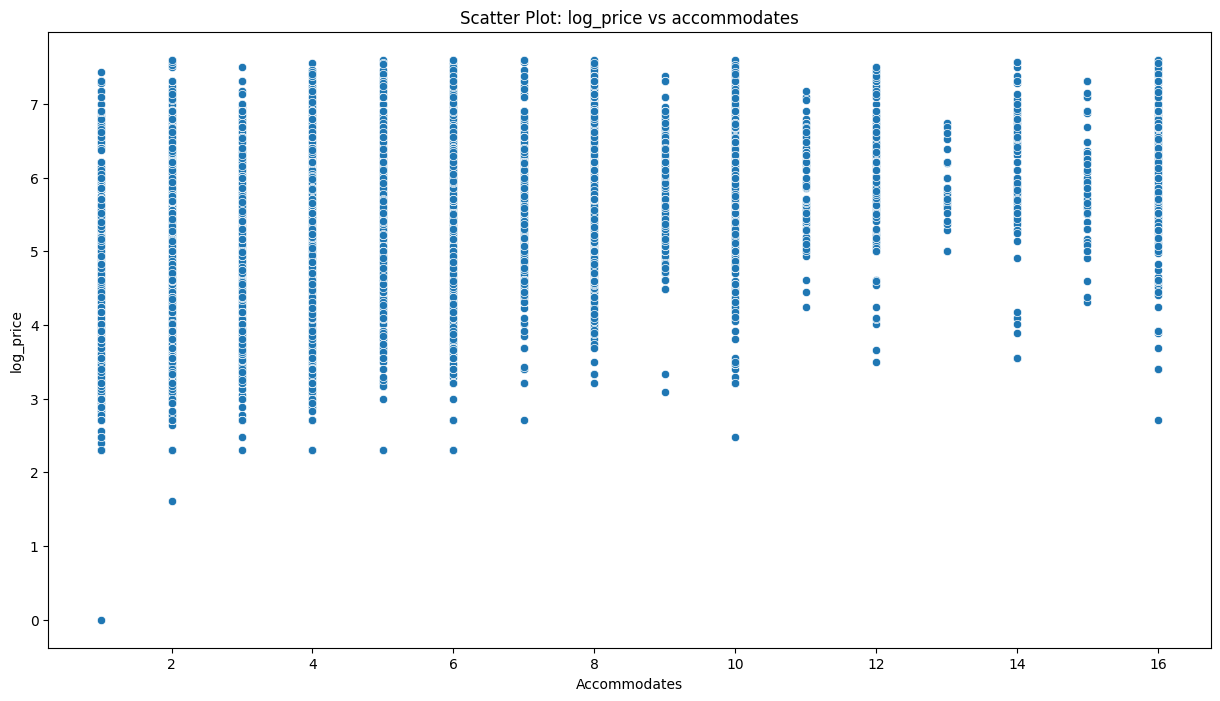

In [ ]:
# Scatter Plot between log_price and accommodates
plt.figure(figsize=(15, 8))
sns.scatterplot(x='accommodates', y='log_price', data=df)
plt.title('Scatter Plot: log_price vs accommodates')
plt.xlabel('Accommodates')
plt.ylabel('log_price')
plt.show()

## 3.Geospatial Analysis

In [ ]:
geo_spatial_df = df[['log_price', 'latitude','longitude', 'neighbourhood']]

geo_spatial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   log_price      74111 non-null  float64
 1   latitude       74111 non-null  float64
 2   longitude      74111 non-null  float64
 3   neighbourhood  67239 non-null  object 
dtypes: float64(3), object(1)
memory usage: 2.3+ MB


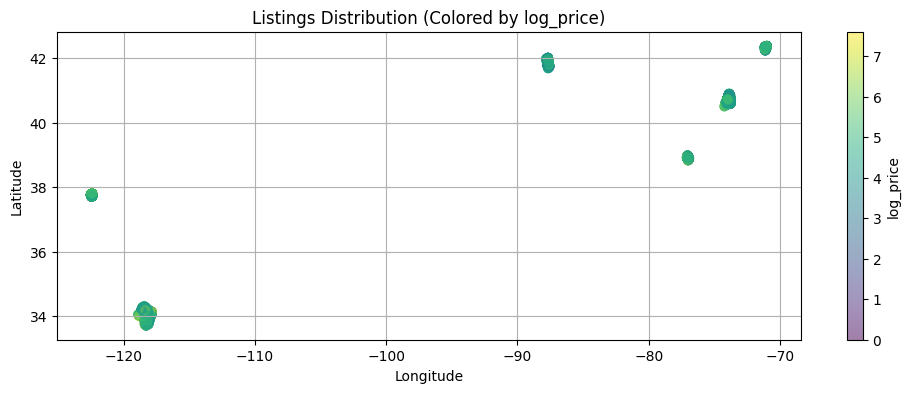

In [ ]:
import matplotlib.pyplot as plt

# Filter out rows with missing neighbourhood data
geo_spatial_df_filtered = geo_spatial_df.dropna(subset=['neighbourhood'])

# Filter log_price based on non-null neighbourhood rows
log_price_filtered = df.loc[geo_spatial_df_filtered.index, 'log_price']

# Plot listings on a map colored by log_price
plt.figure(figsize=(12, 4))
plt.scatter(geo_spatial_df_filtered['longitude'], geo_spatial_df_filtered['latitude'], c=log_price_filtered, cmap='viridis', alpha=0.5)
plt.colorbar(label='log_price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Listings Distribution (Colored by log_price)')
plt.grid(True)
plt.show()

## 4.Sentiment Analysis on Textual Data

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### Polarity scores of Text

Define a function ```get_sentiment_score``` that takes text as input and returns a score between -1 (negative) and 1 (positive). This score reflects the overall sentiment expressed in the text. We'll then apply this function to the description column of our DataFrame, creating a new column named ```sentiment_score``` that holds the sentiment score for each listing's description.

In [ ]:
# Function to calculate sentiment scores
def get_sentiment_score(text):
    # Convert to string if not already
    text = str(text)
    # Get sentiment scores
    scores = sid.polarity_scores(text)
    # Return compound score (normalized score between -1 and 1)
    return scores['compound']

# Apply sentiment analysis to the 'description' column
df['sentiment_score'] = df['description'].apply(get_sentiment_score)

### LogPrice vs SentimentScore

The scatter plot you generated shows a weak positive relationship between sentiment score and log price. This means that listings with higher sentiment scores tend to have higher log prices, but there is a lot of variation.

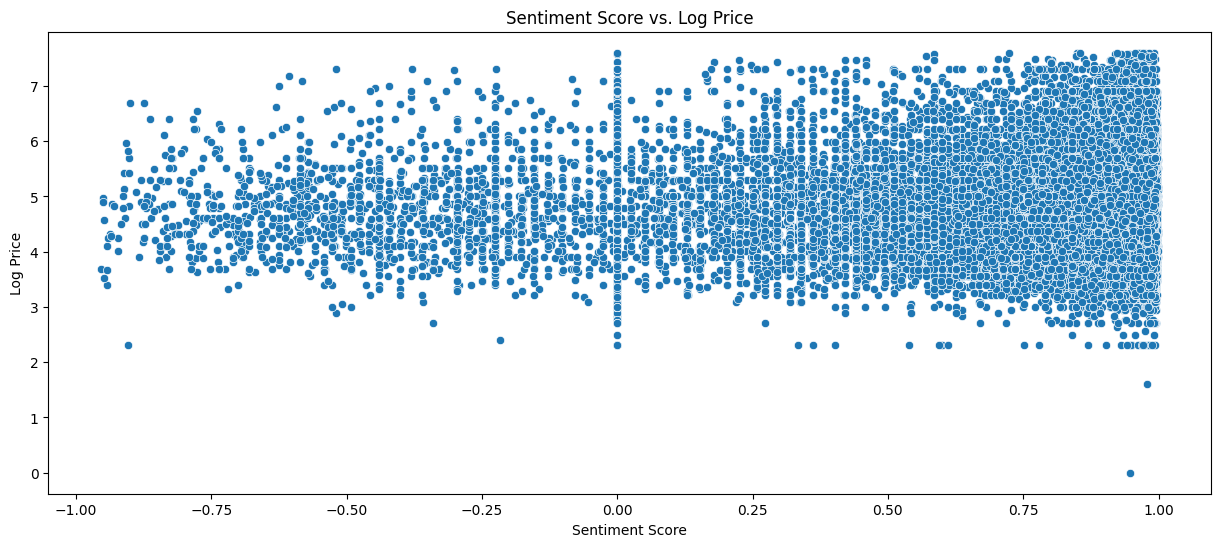

In [ ]:
# Check if sentiment score influences listing prices
# For example, you can plot sentiment score against log_price
plt.figure(figsize=(15, 6))
sns.scatterplot(x='sentiment_score', y='log_price', data=df)
plt.title('Sentiment Score vs. Log Price')
plt.xlabel('Sentiment Score')
plt.ylabel('Log Price')
plt.show()

## 5.Aminities Anlaysis

### Parsing

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
from sklearn.preprocessing import MultiLabelBinarizer

# Assuming df contains the DataFrame with the listings data

# Step 1: Parse Amenities
df['amenities'] = df['amenities'].str.replace('"','').str.split("{").str[1].str.rstrip('}').str.split(",")

### Encoding

To incorporate amenities data into our analysis, we'll transform it from text to numerical features. We'll use a MultiLabelBinarizer which creates one binary column for each unique amenity. If a listing offers that amenity, the corresponding column value will be 1, otherwise 0. This allows machine learning models to understand the presence or absence of each amenity.

In [ ]:
# Step 2: Encode Amenities
mlb = MultiLabelBinarizer()
amenities_encoded = pd.DataFrame(mlb.fit_transform(df['amenities']), columns=mlb.classes_, index=df.index)
df_encoded = pd.concat([df, amenities_encoded], axis=1)

### Correlation Analysis

This step calculates the correlation coefficients between 'log_price' and all other numeric columns in the DataFrame. This analysis helps identify which numeric features might be most relevant to predicting 'log_price'.

In [ ]:
# Step 3: Correlation Analysis
numeric_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_encoded[numeric_columns].corr()['log_price']

### Statistical Tests

For each amenity, we compare the log prices of listings with the amenity (value of 1) to those without (value of 0). We perform an independent samples t-test to determine the statistical significance of the price difference. Amenities with a p-value lower than 0.05 (indicating a statistically significant difference) will be stored in the significant_amenities dictionary along with their corresponding p-values.

In [ ]:
# Step 4: Statistical Tests
significant_amenities = {}
for amenity in amenities_encoded.columns:
    has_amenity = df_encoded[df_encoded[amenity] == 1]['log_price']
    no_amenity = df_encoded[df_encoded[amenity] == 0]['log_price']
    p_value = ttest_ind(has_amenity, no_amenity).pvalue
    if p_value < 0.05:  # assuming significance level of 0.05
        significant_amenities[amenity] = p_value

### Ranking Aminities

In [ ]:
# Step 5: Ranking Amenities
significant_amenities = sorted(significant_amenities.items(), key=lambda x: x[1])

In [ ]:
significant_amenities

[('Cable TV', 0.0),
 ('Dryer', 0.0),
 ('Family/kid friendly', 0.0),
 ('Indoor fireplace', 0.0),
 ('TV', 0.0),
 ('Washer', 0.0),
 ('translation missing: en.hosting_amenity_49', 0.0),
 ('translation missing: en.hosting_amenity_50', 0.0),
 ('Lock on bedroom door', 4.462584425681297e-295),
 ('Doorman', 2.0199391659412343e-237),
 ('Hair dryer', 3.732055322544811e-226),
 ('Suitable for events', 4.4096517651608607e-219),
 ('Private entrance', 2.3294621265946124e-213),
 ('Gym', 9.70189513411269e-208),
 ('Iron', 2.1002638615937944e-206),
 ('24-hour check-in', 1.2796417810950166e-199),
 ('Heating', 4.838730369663453e-177),
 ('Kitchen', 2.0343103692351268e-167),
 ('Elevator', 2.9872564418075074e-166),
 ('Pets live on this property', 6.426672618066918e-159),
 ('Shampoo', 6.167816365473141e-146),
 ('Internet', 8.700970160971637e-143),
 ('Laptop friendly workspace', 2.014561855190334e-139),
 ('Self Check-In', 3.7639323332264787e-129),
 ('Pets allowed', 4.343662987104084e-115),
 ('Dishwasher', 1.1351

In [ ]:
df = pd.concat([df, amenities_encoded], axis=1)
df = df.drop('amenities', axis=1)

## 6.Categorical Data Encoding

In [ ]:
# Apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df, columns=['room_type', 'city', 'property_type'])

In [ ]:
df = pd.concat([df, df_encoded], axis=1)
df = df.drop(['room_type', 'city', 'property_type'], axis=1)

## 7.Model Development and Training

### Drop Non-Numeric Cols

In [ ]:
X = df.drop(columns=['id', 'log_price', 'description', 'name', 'first_review', 'last_review', 'thumbnail_url', 'zipcode', 'neighbourhood'])
y = df['log_price']

In [ ]:
# Handle missing values
X.fillna(0, inplace=True)

In [ ]:
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
X_numeric = X[numeric_columns]

### Shuffle for LogPrice

In [ ]:
# Shuffle the dataset with respect to the log_price column
data = pd.concat([X_numeric, df['log_price']], axis=1)
shuffled_data = data.sample(frac=1, random_state=42)

In [ ]:
# Separate features and target variable from the shuffled dataset
X_shuffled = shuffled_data.drop(columns='log_price')
y_shuffled = shuffled_data['log_price']

### Split Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=42)

In [ ]:
y_train = y_train.loc[:, ~y_train.columns.duplicated()]
y_test = y_test.loc[:, ~y_test.columns.duplicated()]

### Simple Linear Regression

In [ ]:
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
baseline_pred = baseline_model.predict(X_test)
baseline_mse = mean_squared_error(y_test, baseline_pred)
print("Baseline Model MSE:", baseline_mse)

Baseline Model MSE: 0.28530583450006475


### RandomForest

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print("RandomForest Model MSE:", rf_mse)

/tmp/ipykernel_18/492498260.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForest Model MSE: 0.17103750095731682


### GradientBoosting

In [ ]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
print("GradientBoosting Model MSE:", gb_mse)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoosting Model MSE: 0.1955452961894836


## 8.Model Optimization and Validation

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
# rf_param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }
# rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error')
# rf_grid_search.fit(X_train, y_train)
# rf_best_model = rf_grid_search.best_estimator_
# rf_pred = rf_best_model.predict(X_test)
# rf_mse = mean_squared_error(y_test, rf_pred)
# print("RandomForest Model MSE:", rf_mse)

In [ ]:
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

# Perform Grid Search with reduced parameters
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                              param_grid=rf_param_grid, cv=2,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)  # Utilize multiple CPU cores
rf_grid_search.fit(X_train, y_train)

# Get the best model and make predictions
rf_best_model = rf_grid_search.best_estimator_
rf_pred = rf_best_model.predict(X_test)

# Calculate MSE
rf_mse = mean_squared_error(y_test, rf_pred)
print("RandomForest Model MSE:", rf_mse)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

RandomForest Model MSE: 0.17103750095731682


In [ ]:
# # GradientBoosting Model
# gb_param_grid = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.05, 0.1, 0.2],
#     'max_depth': [3, 5, 7]
# }
# gb_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid=gb_param_grid, cv=5, scoring='neg_mean_squared_error')
# gb_grid_search.fit(X_train, y_train)
# gb_best_model = gb_grid_search.best_estimator_
# gb_pred = gb_best_model.predict(X_test)
# gb_mse = mean_squared_error(y_test, gb_pred)
# print("GradientBoosting Model MSE:", gb_mse)

In [ ]:
# Define a smaller parameter grid
gb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

# Perform Grid Search with reduced parameters
gb_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42),
                              param_grid=gb_param_grid, cv=2,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)  # Utilize multiple CPU cores
gb_grid_search.fit(X_train, y_train)

# Get the best model and make predictions
gb_best_model = gb_grid_search.best_estimator_
gb_pred = gb_best_model.predict(X_test)

# Calculate MSE
gb_mse = mean_squared_error(y_test, gb_pred)
print("GradientBoosting Model MSE:", gb_mse)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

GradientBoosting Model MSE: 0.1752283031882692


## 9.Feature Importance and Model Insights

In [ ]:
import shap
import matplotlib.pyplot as plt

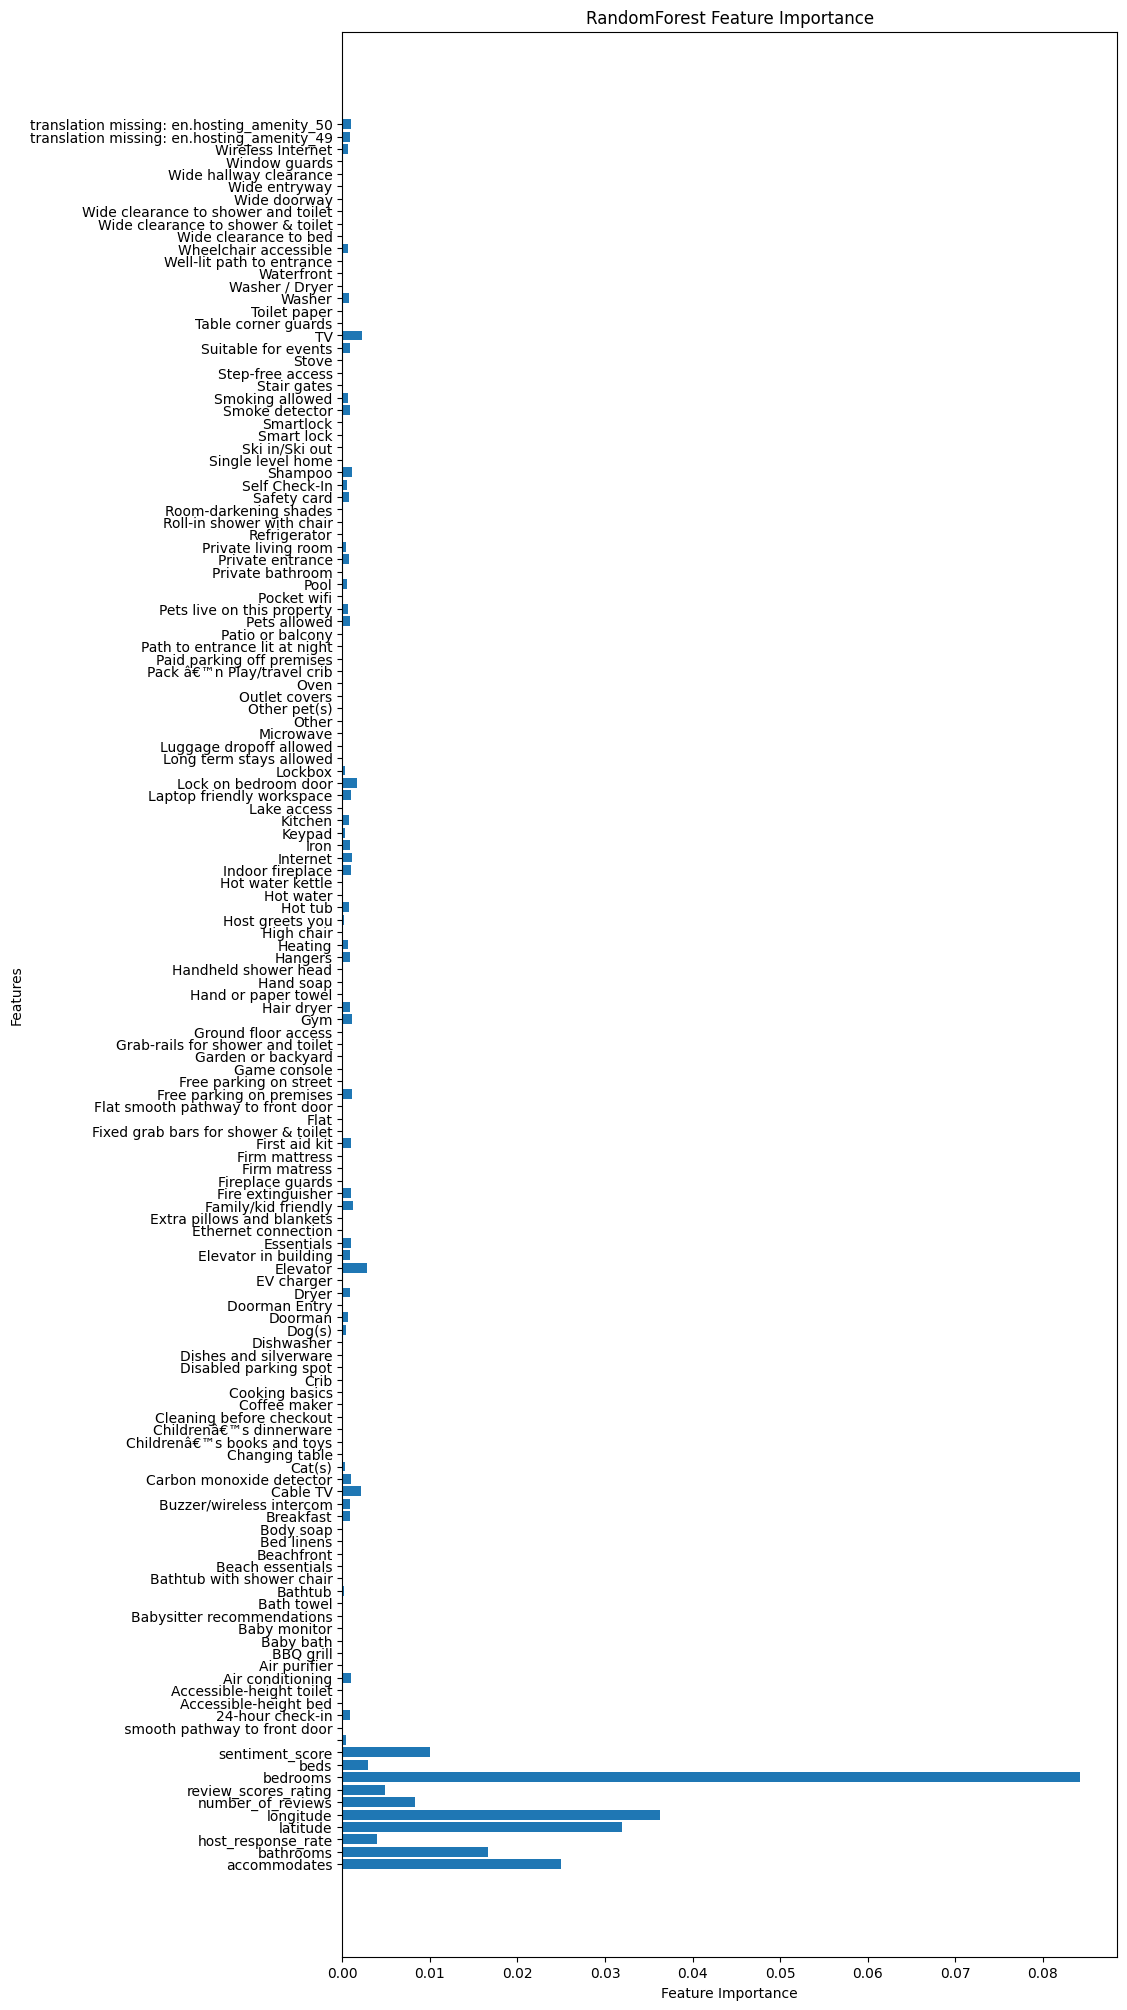

In [ ]:
# Analyze Feature Importance and Model Insights
# RandomForest Feature Importance
rf_feature_importance = rf_best_model.feature_importances_

# Plot RandomForest Feature Importance
plt.figure(figsize=(10, 25))
plt.barh(X_train.columns, rf_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('RandomForest Feature Importance')
plt.show()

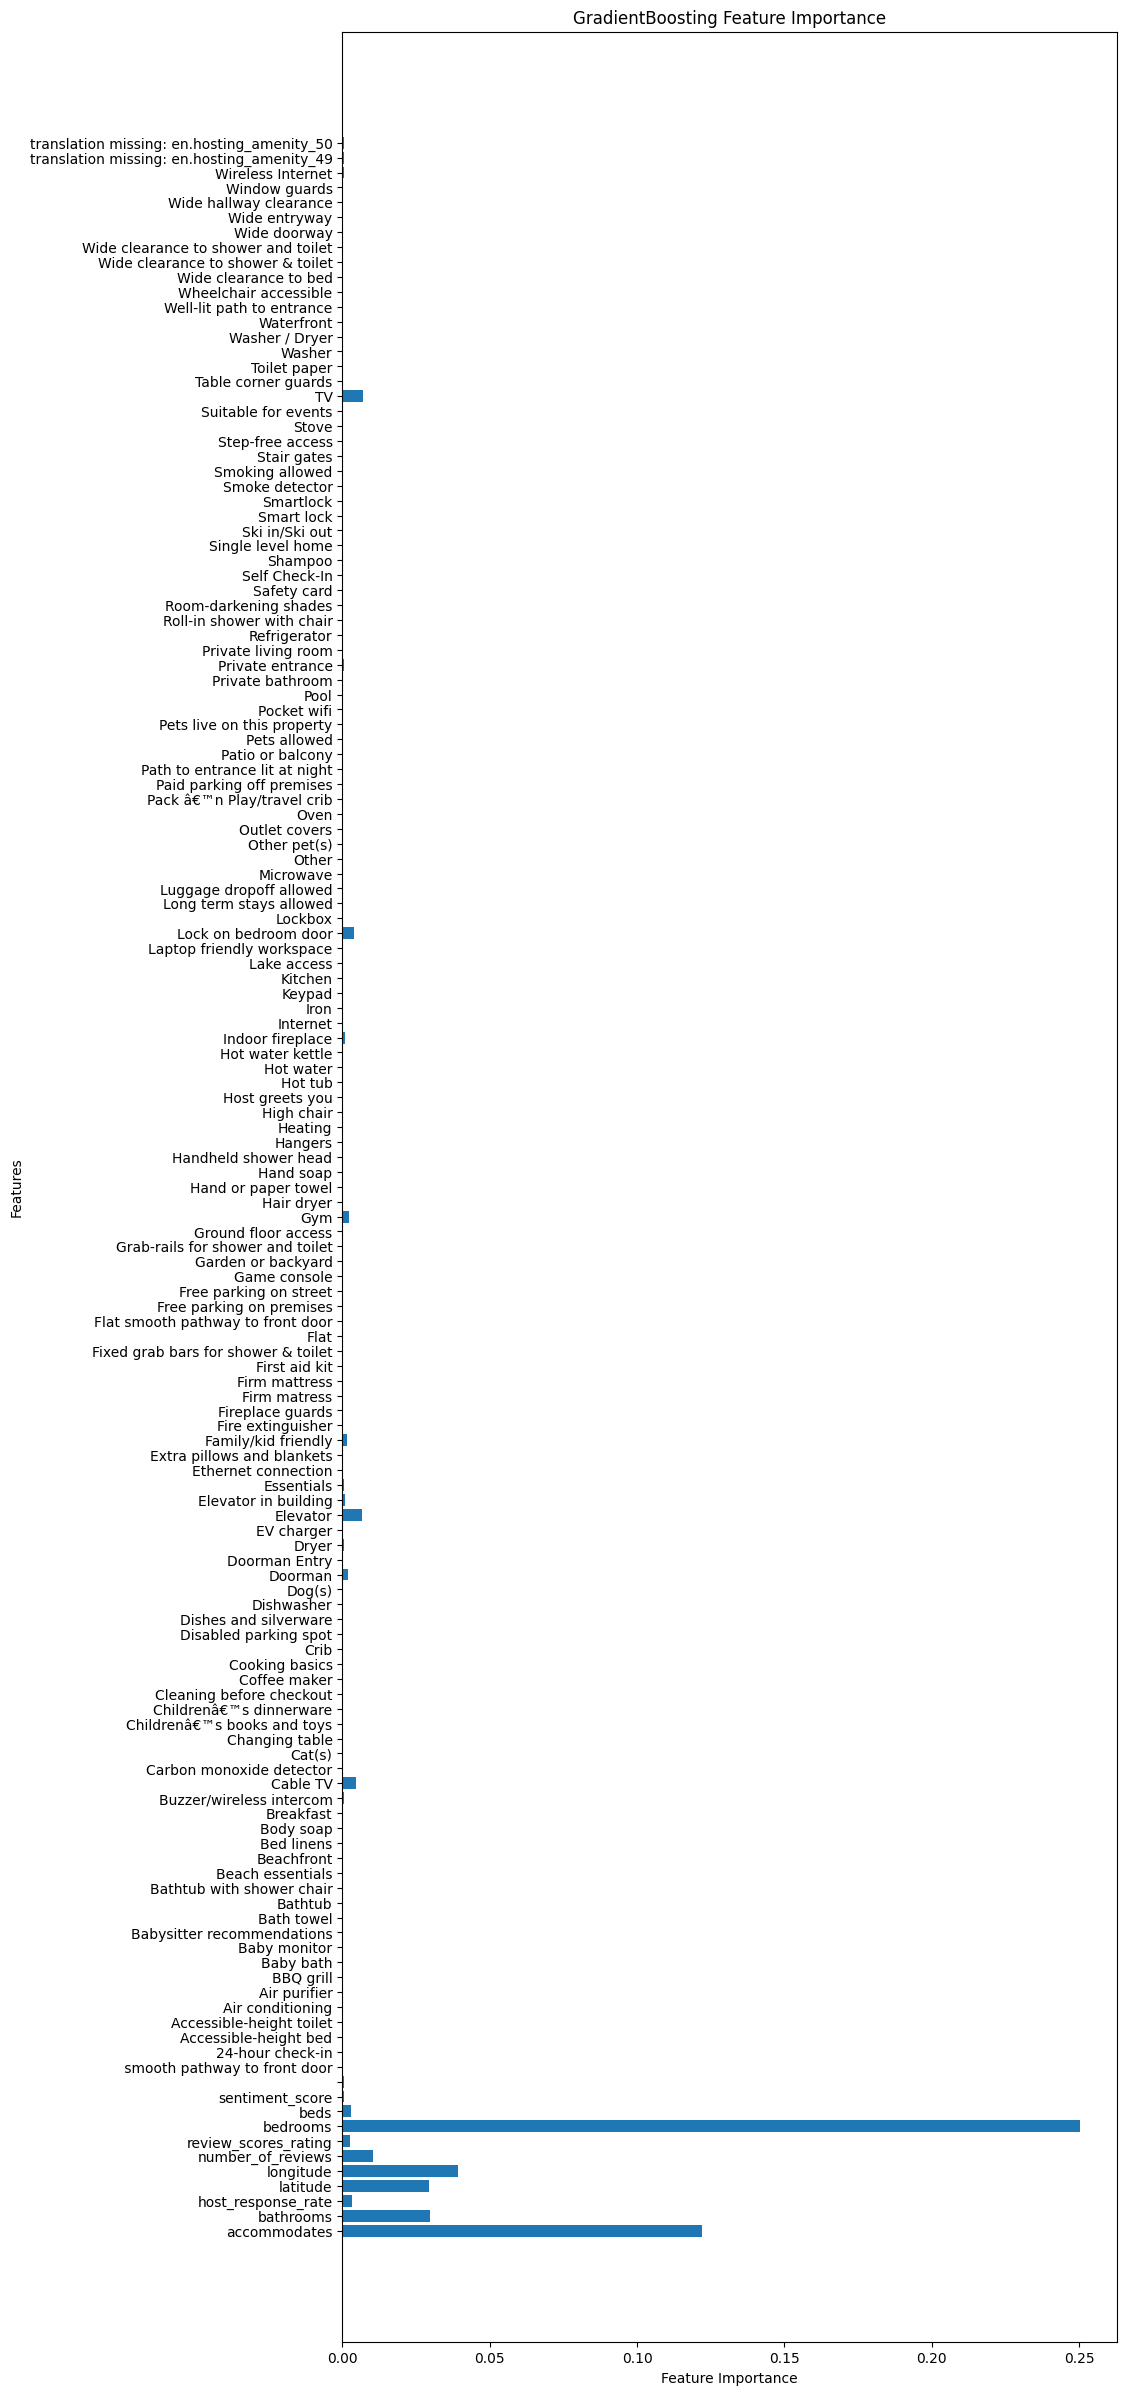

In [ ]:
# GradientBoosting Feature Importance
gb_feature_importance = gb_best_model.feature_importances_

# Plot GradientBoosting Feature Importance
plt.figure(figsize=(10, 30))
plt.barh(X_train.columns, gb_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('GradientBoosting Feature Importance')
plt.show()

In [ ]:
# SHAP Values (GradientBoosting)
explainer = shap.Explainer(gb_best_model)
shap_values = explainer.shap_values(X_test)

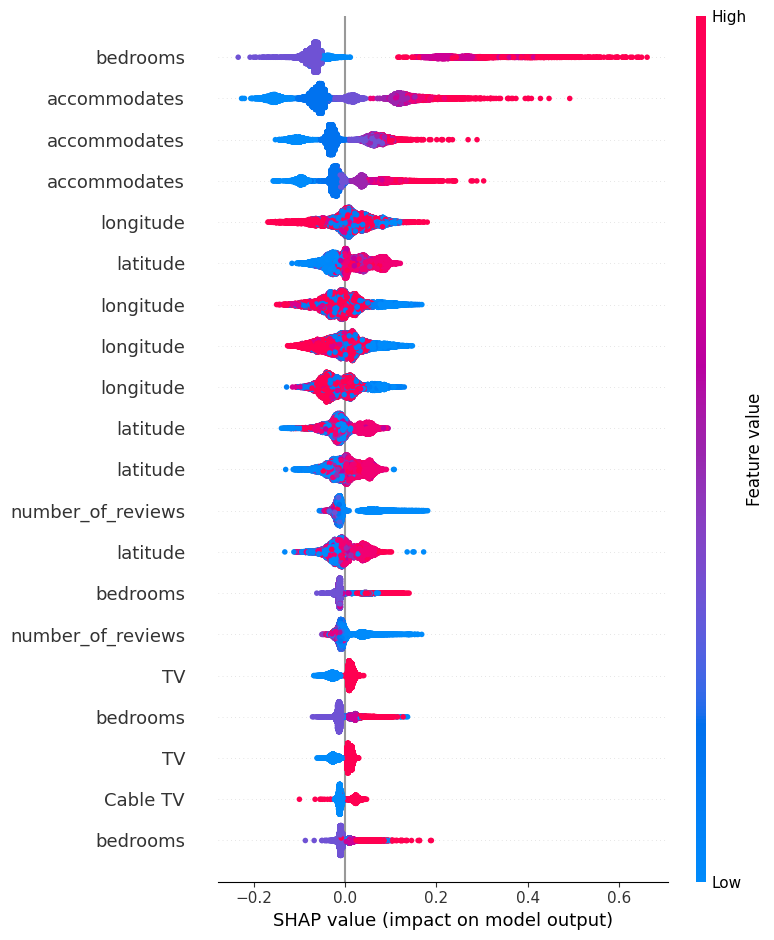

In [ ]:
# Summary Plot
shap.summary_plot(shap_values, X_test)

## 10.Predictive Performance Assessment

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

### RMSE for RF model

In [ ]:
# Evaluate Performance on Test Set and Residual Analysis
# Calculate RMSE and R-squared for RandomForest Model
rf_test_pred = rf_best_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_test_pred))
rf_r2 = r2_score(y_test, rf_test_pred)
print("RandomForest Model - RMSE:", rf_rmse)
print("RandomForest Model - R-squared:", rf_r2)

RandomForest Model - RMSE: 0.41356680350013203
RandomForest Model - R-squared: 0.6715577817251368


### RMSE for GB model

In [ ]:
# Calculate RMSE and R-squared for GradientBoosting Model
gb_test_pred = gb_best_model.predict(X_test)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_test_pred))
gb_r2 = r2_score(y_test, gb_test_pred)
print("GradientBoosting Model - RMSE:", gb_rmse)
print("GradientBoosting Model - R-squared:", gb_r2)

GradientBoosting Model - RMSE: 0.41860279882995194
GradientBoosting Model - R-squared: 0.6635102110264235


### Residual Analysis

In [ ]:
# Residual Analysis
import numpy as np

# Convert y_test to a NumPy array and flatten it
y_test = y_test.to_numpy().flatten()

# Reshape rf_test_pred to match the shape of y_test_array
rf_test_pred = rf_test_pred.reshape(-1)

# Residual Analysis
rf_residuals = y_test - rf_test_pred


In [ ]:
# Residual Analysis
import numpy as np

# Convert y_test to a NumPy array and flatten it
# y_test = y_test.to_numpy().flatten()

# Reshape rf_test_pred to match the shape of y_test_array
gb_test_pred = gb_test_pred.reshape(-1)

# Residual Analysis
gb_residuals = y_test - gb_test_pred


### Model Residual Plottings

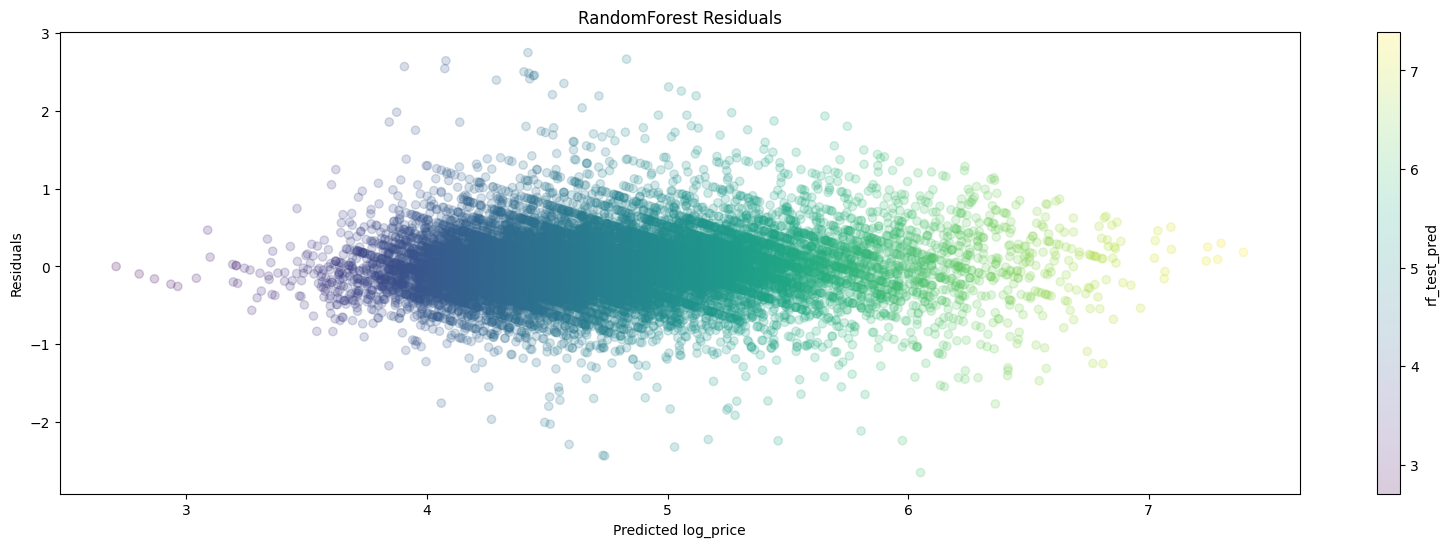

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))  # Adjusted figure size
plt.scatter(rf_test_pred, rf_residuals, c=rf_test_pred, cmap='viridis', alpha=0.2)
plt.colorbar(label='rf_test_pred')  # Add colorbar to show the mapping
plt.title('RandomForest Residuals')
plt.xlabel('Predicted log_price')
plt.ylabel('Residuals')
plt.show()


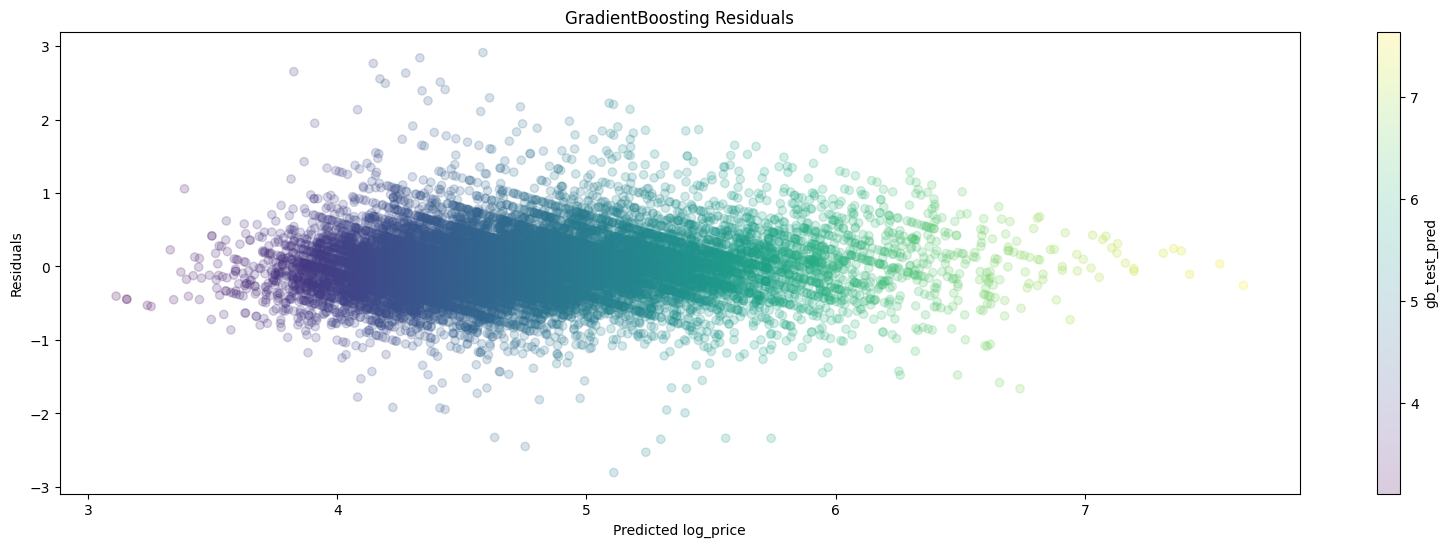

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))  # Adjusted figure size
plt.scatter(gb_test_pred, gb_residuals, c=gb_test_pred, cmap='viridis', alpha=0.2)
plt.colorbar(label='gb_test_pred')  # Add colorbar to show the mapping
plt.title('GradientBoosting Residuals')
plt.xlabel('Predicted log_price')
plt.ylabel('Residuals')
plt.show()
